In [21]:
import os
import pandas as pd
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Carga de irradiación
nom_fi_datos_Irrad = os.path.join(os.getcwd(),"G02A_DATOS_IRRAD.csv")
df_orig_Irrad = pd.read_csv(nom_fi_datos_Irrad)
# parseamos la fecha (cadena) para que sea un datetime con formato yyyy/mm/dd
df_orig_Irrad['FECHA'] = pd.to_datetime(df_orig_Irrad['FECHA'], format='%Y-%m-%d')

s = df_orig_Irrad.loc[:,'FECHA']
df_orig_Irrad['FECHA'] =  s.dt.date

# Carga de utilidad
nom_fi_datos_Util = os.path.join(os.getcwd(),"G02A_DATOS_UTIL.csv")
df_orig_Util = pd.read_csv(nom_fi_datos_Util)
df_orig_Util['FECHA'] = pd.to_datetime(df_orig_Irrad['FECHA'], format='%Y-%m-%d')
s = df_orig_Util.loc[:,'FECHA']
df_orig_Util['FECHA'] =  s.dt.date





## 1. Preprocesado

In [22]:
#valor que mides de irradiación, media cada 3 horas
df_orig_Irrad.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,720787.40,1250876.4,321124.25,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,706537.90,1200328.0,240638.28,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,689722.75,1212699.0,308298.53,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,709174.06,1227577.8,340632.30,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,717798.06,1239895.0,336642.70,0.0,0.0,2015,1,5,0


In [23]:
#valor que se genera de la potencia que se tiene instalada, media cada 3 horas
df_orig_Util.head()

,FECHA,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.000028,0.000026,0.058280,0.493552,0.507370,0.060543,0.000026,0.000024,2015,1,1,3
1,2015-01-02,0.000020,0.000031,0.069688,0.533332,0.482276,0.045711,0.000026,0.000025,2015,1,2,4
2,2015-01-03,0.000025,0.000031,0.064860,0.512002,0.497585,0.059138,0.000028,0.000023,2015,1,3,5
3,2015-01-04,0.000023,0.000028,0.065306,0.518908,0.511468,0.061739,0.000028,0.000026,2015,1,4,6
4,2015-01-05,0.000021,0.000031,0.052947,0.424561,0.434292,0.044874,0.000029,0.000020,2015,1,5,0


In [24]:
df_orig_Util.describe()

,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.0
mean,0.000150,0.007247,0.204280,0.497555,0.477265,0.171307,0.004907,0.000169,2017.500456,6.521898,15.732664,3.0
std,0.000210,0.011252,0.133693,0.171874,0.163777,0.115757,0.008135,0.000220,1.708571,3.449773,8.803378,2.0
min,-0.000239,-0.000241,0.001812,0.023764,0.019662,0.000345,-0.000245,-0.000228,2015.000000,1.000000,1.000000,0.0
25%,0.000012,0.000062,0.072748,0.378201,0.364207,0.059761,0.000028,0.000011,2016.000000,4.000000,8.000000,1.0
50%,0.000025,0.000532,0.198806,0.544501,0.513525,0.163431,0.000403,0.000025,2017.500000,7.000000,16.000000,3.0
75%,0.000268,0.011300,0.328230,0.632853,0.609663,0.276302,0.006639,0.000299,2019.000000,10.000000,23.000000,5.0
max,0.003224,0.044939,0.476541,0.785963,0.758074,0.401852,0.034350,0.001102,2020.000000,12.000000,31.000000,6.0


In [25]:
# Vemos si hay nulls que limpiar en el dataset
nulls = df_orig_Util.isnull().any()
print(nulls)

FECHA      False
UTILH00    False
UTILH03    False
UTILH06    False
UTILH09    False
UTILH12    False
UTILH15    False
UTILH18    False
UTILH21    False
ANNO       False
MES        False
DIA        False
DIASEM     False
dtype: bool


In [26]:
# Vemos si hay nulls que limpiar en el dataset
nulls = df_orig_Irrad.isnull().any()
print(nulls)

FECHA       False
IRRADH00    False
IRRADH03    False
IRRADH06    False
IRRADH09    False
IRRADH12    False
IRRADH15    False
IRRADH18    False
IRRADH21    False
ANNO        False
MES         False
DIA         False
DIASEM      False
dtype: bool


In [27]:
duplicados = df_orig_Util.duplicated().sum()==0
print(duplicados)

True


In [28]:
duplicados = df_orig_Irrad.duplicated().sum()==0
print(duplicados)

True


In [29]:
#Vemos duplicados por fecha para Irrad
fechas_totales = df_orig_Irrad['FECHA'].nunique()
print(fechas_totales)
dif= df_orig_Irrad['FECHA'].max()-df_orig_Irrad['FECHA'].min()
print(dif)


2192
2191 days, 0:00:00


In [30]:
#Vemos duplicados por fecha para Util
fechas_totales = df_orig_Util['FECHA'].nunique()
print(fechas_totales)
dif= df_orig_Util['FECHA'].max()-df_orig_Util['FECHA'].min()
print(dif)

2192
2191 days, 0:00:00


In [36]:
df_orig_Irrad.drop(['ANNO','MES','DIA','DIASEM'],axis=1,inplace=True)
df_unido = pd.merge(df_orig_Irrad, df_orig_Util, how='inner', on='FECHA')

df_unido.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,UTILH00,...,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,720787.40,1250876.4,321124.25,0.0,0.0,0.000028,...,0.058280,0.493552,0.507370,0.060543,0.000026,0.000024,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,706537.90,1200328.0,240638.28,0.0,0.0,0.000020,...,0.069688,0.533332,0.482276,0.045711,0.000026,0.000025,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,689722.75,1212699.0,308298.53,0.0,0.0,0.000025,...,0.064860,0.512002,0.497585,0.059138,0.000028,0.000023,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,709174.06,1227577.8,340632.30,0.0,0.0,0.000023,...,0.065306,0.518908,0.511468,0.061739,0.000028,0.000026,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,717798.06,1239895.0,336642.70,0.0,0.0,0.000021,...,0.052947,0.424561,0.434292,0.044874,0.000029,0.000020,2015,1,5,0


In [37]:
df_unido.to_csv('union_datasets.csv', index=False)


## 2. EDA

In [38]:
df_unido.describe()

,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
count,2192.0,2192.0,2192.000000,2.192000e+03,2.192000e+03,2.192000e+03,2192.000000,2192.0,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.0
mean,0.0,0.0,242424.716626,1.411924e+06,1.790564e+06,8.859478e+05,37394.678639,0.0,0.000150,0.007247,0.204280,0.497555,0.477265,0.171307,0.004907,0.000169,2017.500456,6.521898,15.732664,3.0
std,0.0,0.0,295119.175677,6.583084e+05,6.945270e+05,5.498604e+05,73317.623325,0.0,0.000210,0.011252,0.133693,0.171874,0.163777,0.115757,0.008135,0.000220,1.708571,3.449773,8.803378,2.0
min,0.0,0.0,0.000000,6.531178e+04,5.010425e+04,6.554419e+03,0.000000,0.0,-0.000239,-0.000241,0.001812,0.023764,0.019662,0.000345,-0.000245,-0.000228,2015.000000,1.000000,1.000000,0.0
25%,0.0,0.0,0.000000,7.962711e+05,1.230576e+06,3.645615e+05,0.000000,0.0,0.000012,0.000062,0.072748,0.378201,0.364207,0.059761,0.000028,0.000011,2016.000000,4.000000,8.000000,1.0
50%,0.0,0.0,67144.655000,1.425261e+06,1.825627e+06,8.696138e+05,0.000000,0.0,0.000025,0.000532,0.198806,0.544501,0.513525,0.163431,0.000403,0.000025,2017.500000,7.000000,16.000000,3.0
75%,0.0,0.0,495683.035000,2.017044e+06,2.396955e+06,1.372217e+06,10318.465000,0.0,0.000268,0.011300,0.328230,0.632853,0.609663,0.276302,0.006639,0.000299,2019.000000,10.000000,23.000000,5.0
max,0.0,0.0,888300.700000,2.515470e+06,2.965906e+06,1.924215e+06,269110.530000,0.0,0.003224,0.044939,0.476541,0.785963,0.758074,0.401852,0.034350,0.001102,2020.000000,12.000000,31.000000,6.0


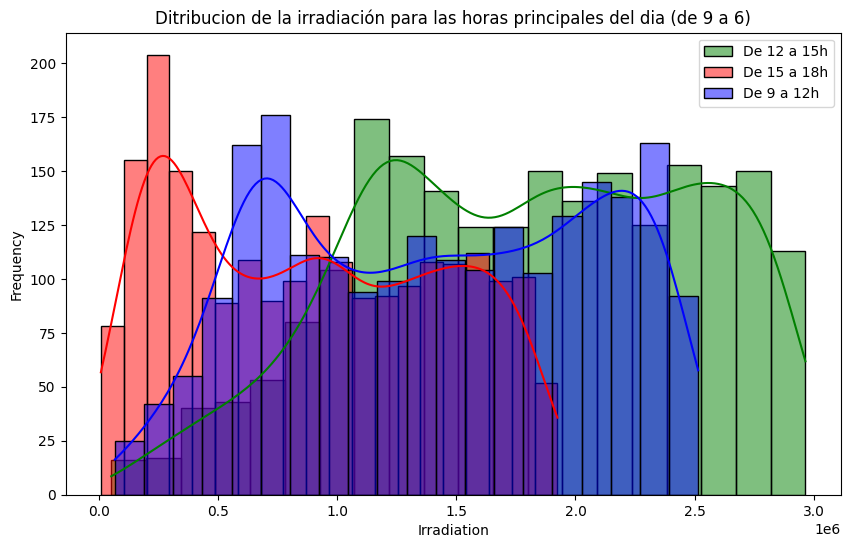

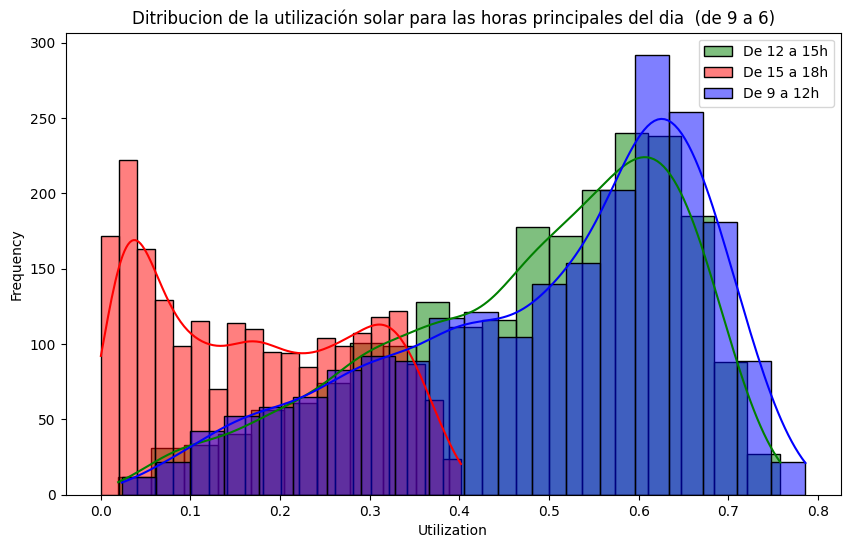

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_unido, x='IRRADH12',bins=20, kde=True,color='green',label='De 12 a 15h')
sns.histplot(data=df_unido, x='IRRADH15', bins=20, kde=True, color='red',label='De 15 a 18h')
sns.histplot(data=df_unido, x='IRRADH09',bins=20, kde=True,color='blue',label='De 9 a 12h')
plt.title('Ditribucion de la irradiación para las horas principales del dia (de 9 a 6)')
plt.xlabel('Irradiation')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_unido, x='UTILH12',bins=20, kde=True,color='green',label='De 12 a 15h')
sns.histplot(data=df_unido, x='UTILH15', bins=20, kde=True, color='red',label='De 15 a 18h')
sns.histplot(data=df_unido, x='UTILH09',bins=20, kde=True,color='blue',label='De 9 a 12h')
plt.title('Ditribucion de la utilización solar para las horas principales del dia  (de 9 a 6)')
plt.xlabel('Utilization')
plt.ylabel('Frequency')
plt.legend()
plt.show()

+ De 15 a 18 horas parece el periodo de estos tres donde menos radiación se recoge, y esto correlaciona bien con la utilización obtenida de las placas
+ Sin embargo por ejemplo para la franja de 9 a 12 horas la utilización tiene una distribución distinta a la radiación, parece más sesgada a la derecha. Lo mismo pasa con la franja de 12 a 15 horas
+ Otra cosa interesante es que a pesar de que la radiación de 12 a 15 es mayor, la distribución de la utilización en ese periodo es algo menor que la de 9 a 12
+ Es curioso que la utilización es mayor en horas en las que la irradiación es menor, en teoría hay menos sol, sin embargo, entendemos que la temperatura afecta, es decir, que cuanto mayor es la temperatura que tenemos en nuestra placa menos es la utilización que podemos obtener de la misma ya que los paneles están preparados para funcionar a una temperatura de trabajo óptima alrededor de 25ºC, en el momento que se sobrepasa, la eficiencia de conversión disminuye ya que se aumenta la resistencia eléctrica interna del panel.

### 2.2 Análisis para medidas entre 0 y 6 horas de la mañana

In [40]:
df_unido[['UTILH00', 'UTILH03']].mean()

UTILH00    0.000150
UTILH03    0.007247
dtype: float64

In [41]:
# Comprobar que todas las filas son 0
columns_list = ['IRRADH00', 'IRRADH03']

all_zero = df_unido[columns_list].eq(0).all(axis=1).all()
all_zero

True

+ Utilización cercana a 0
+ Los registros de irradiación están a cero todos los días
+ Para predicción deberemos usar otros datos de irradiación, lo que pueden perjudicar el MSE
+ PREGUNTAR SI ES NECESARIO PREDECIR ESTOS MARGENES HORARIOS PORQUE LOS CONSIDERAMOS COMO 0  

### 2.3 Relación entre variables

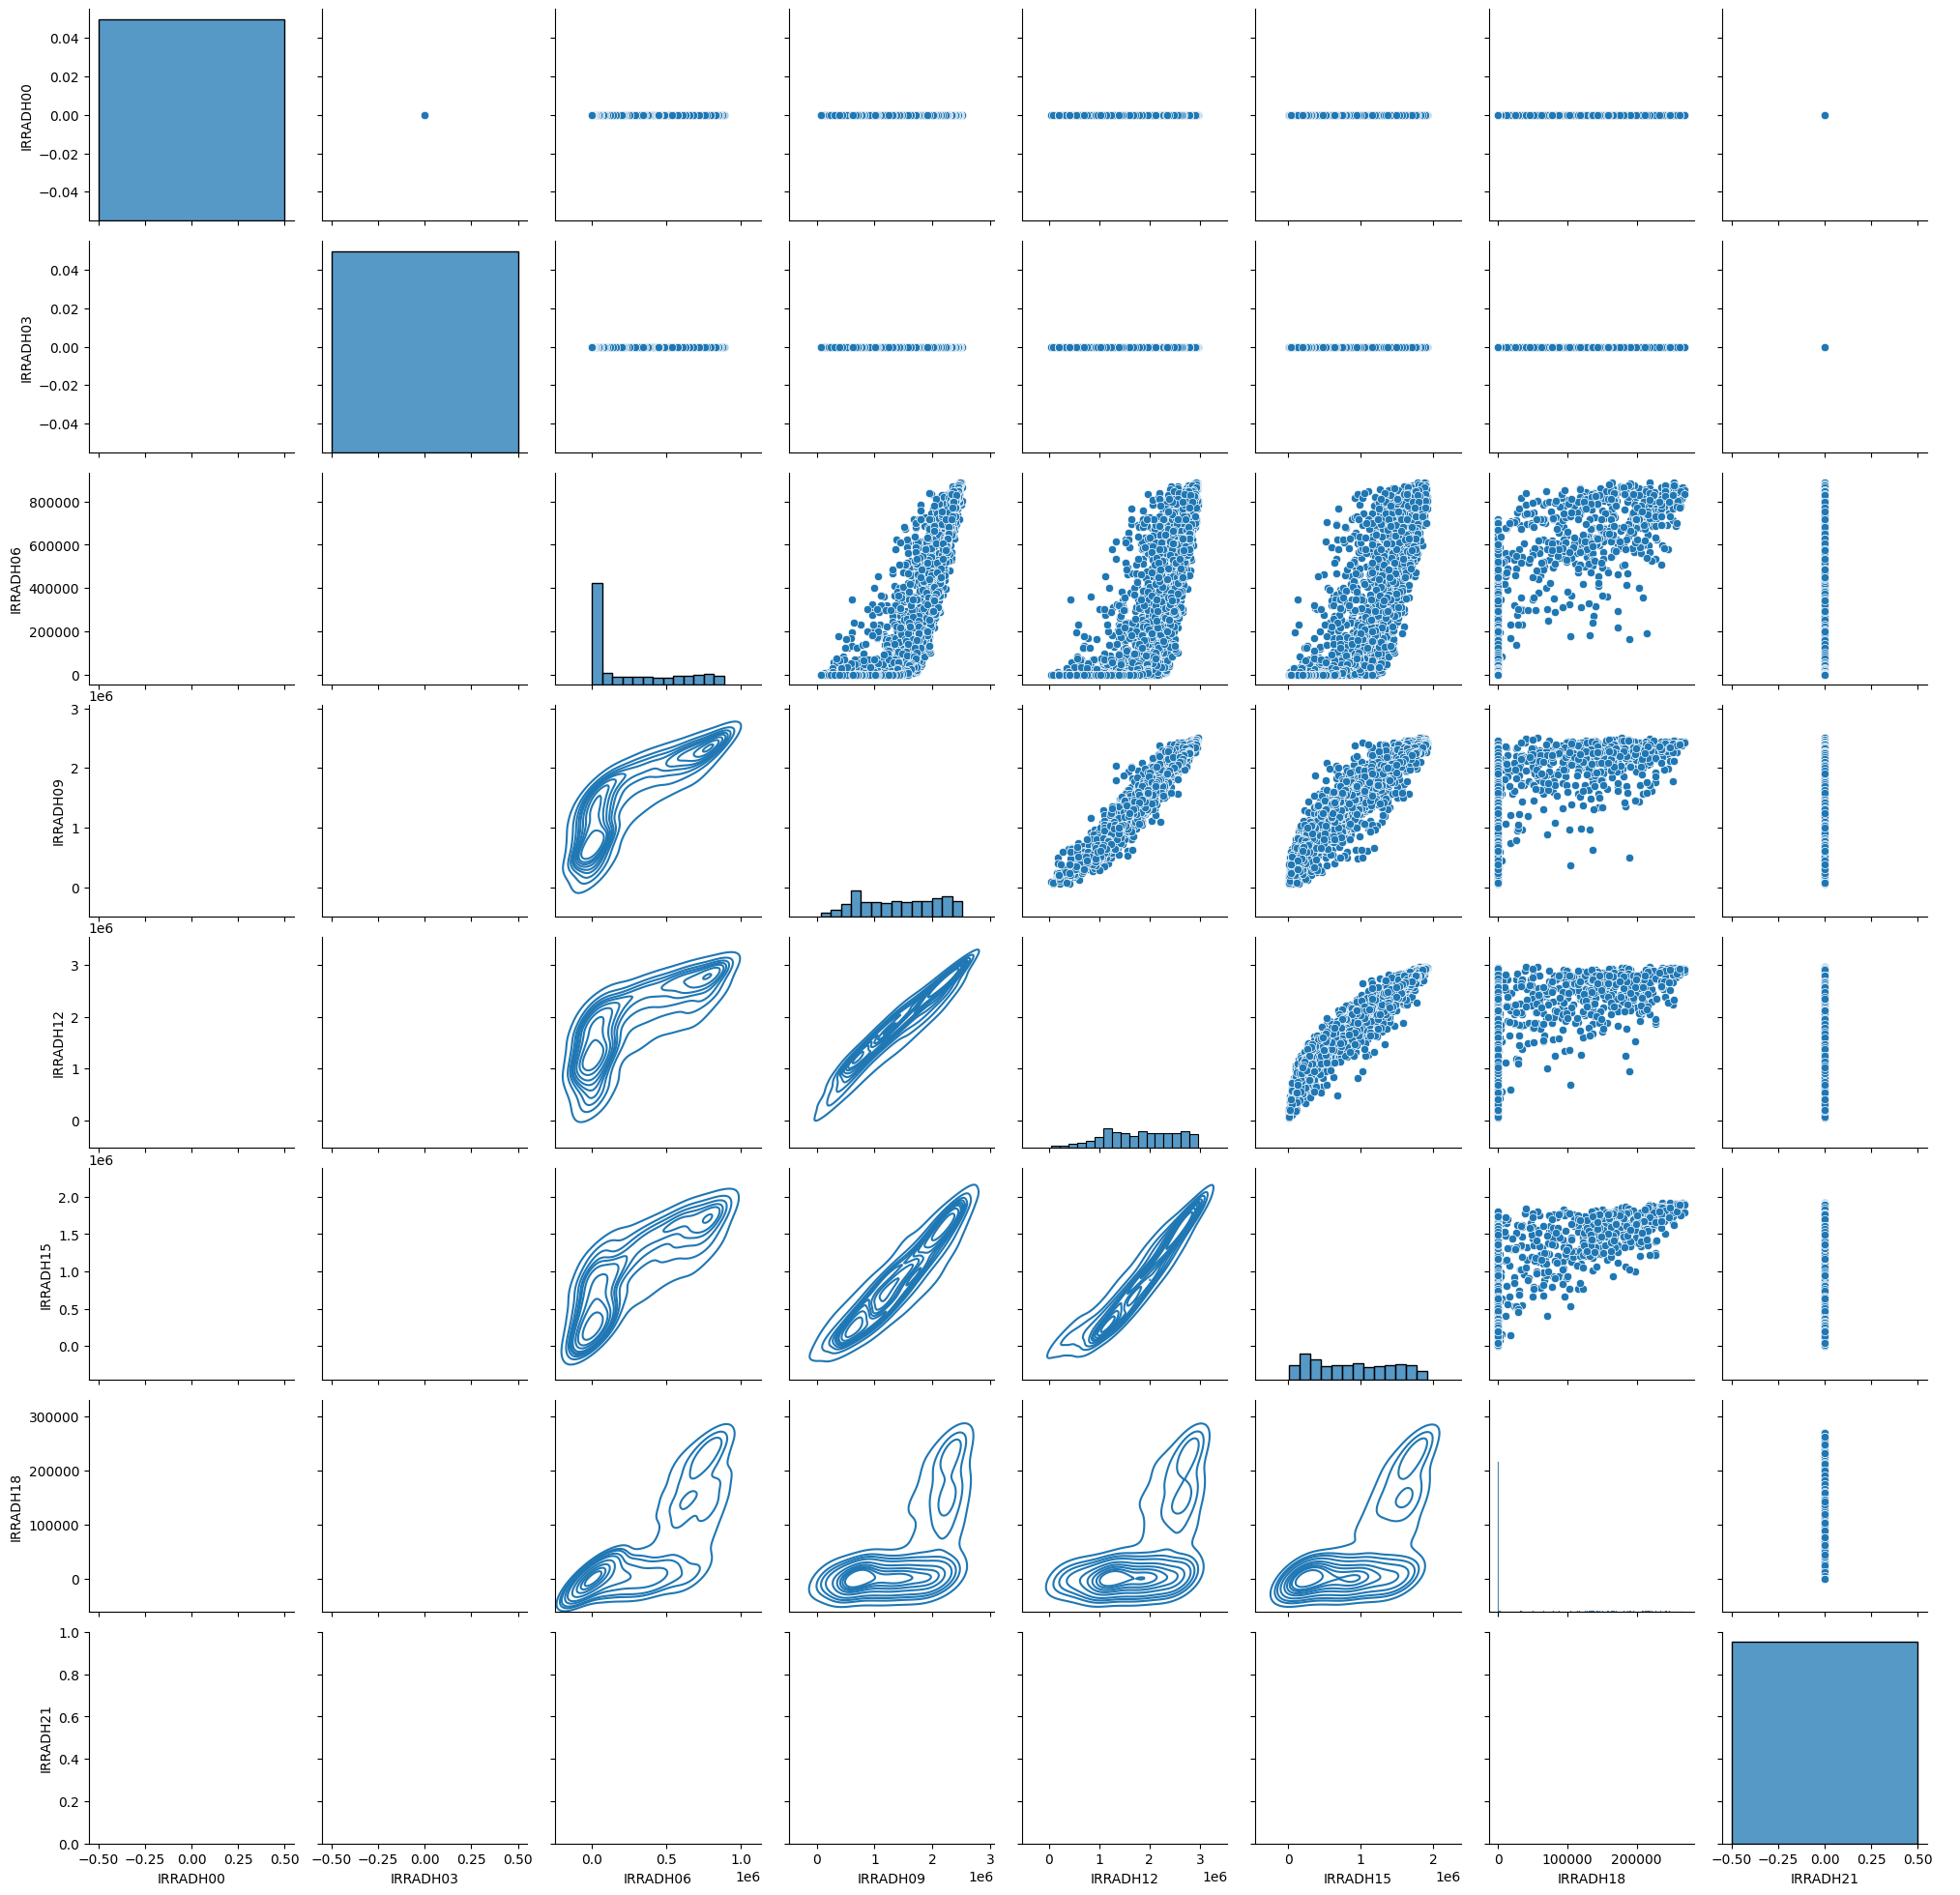

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filtrar solo columnas numéricas
g = sns.PairGrid(df_orig_Irrad)
g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()


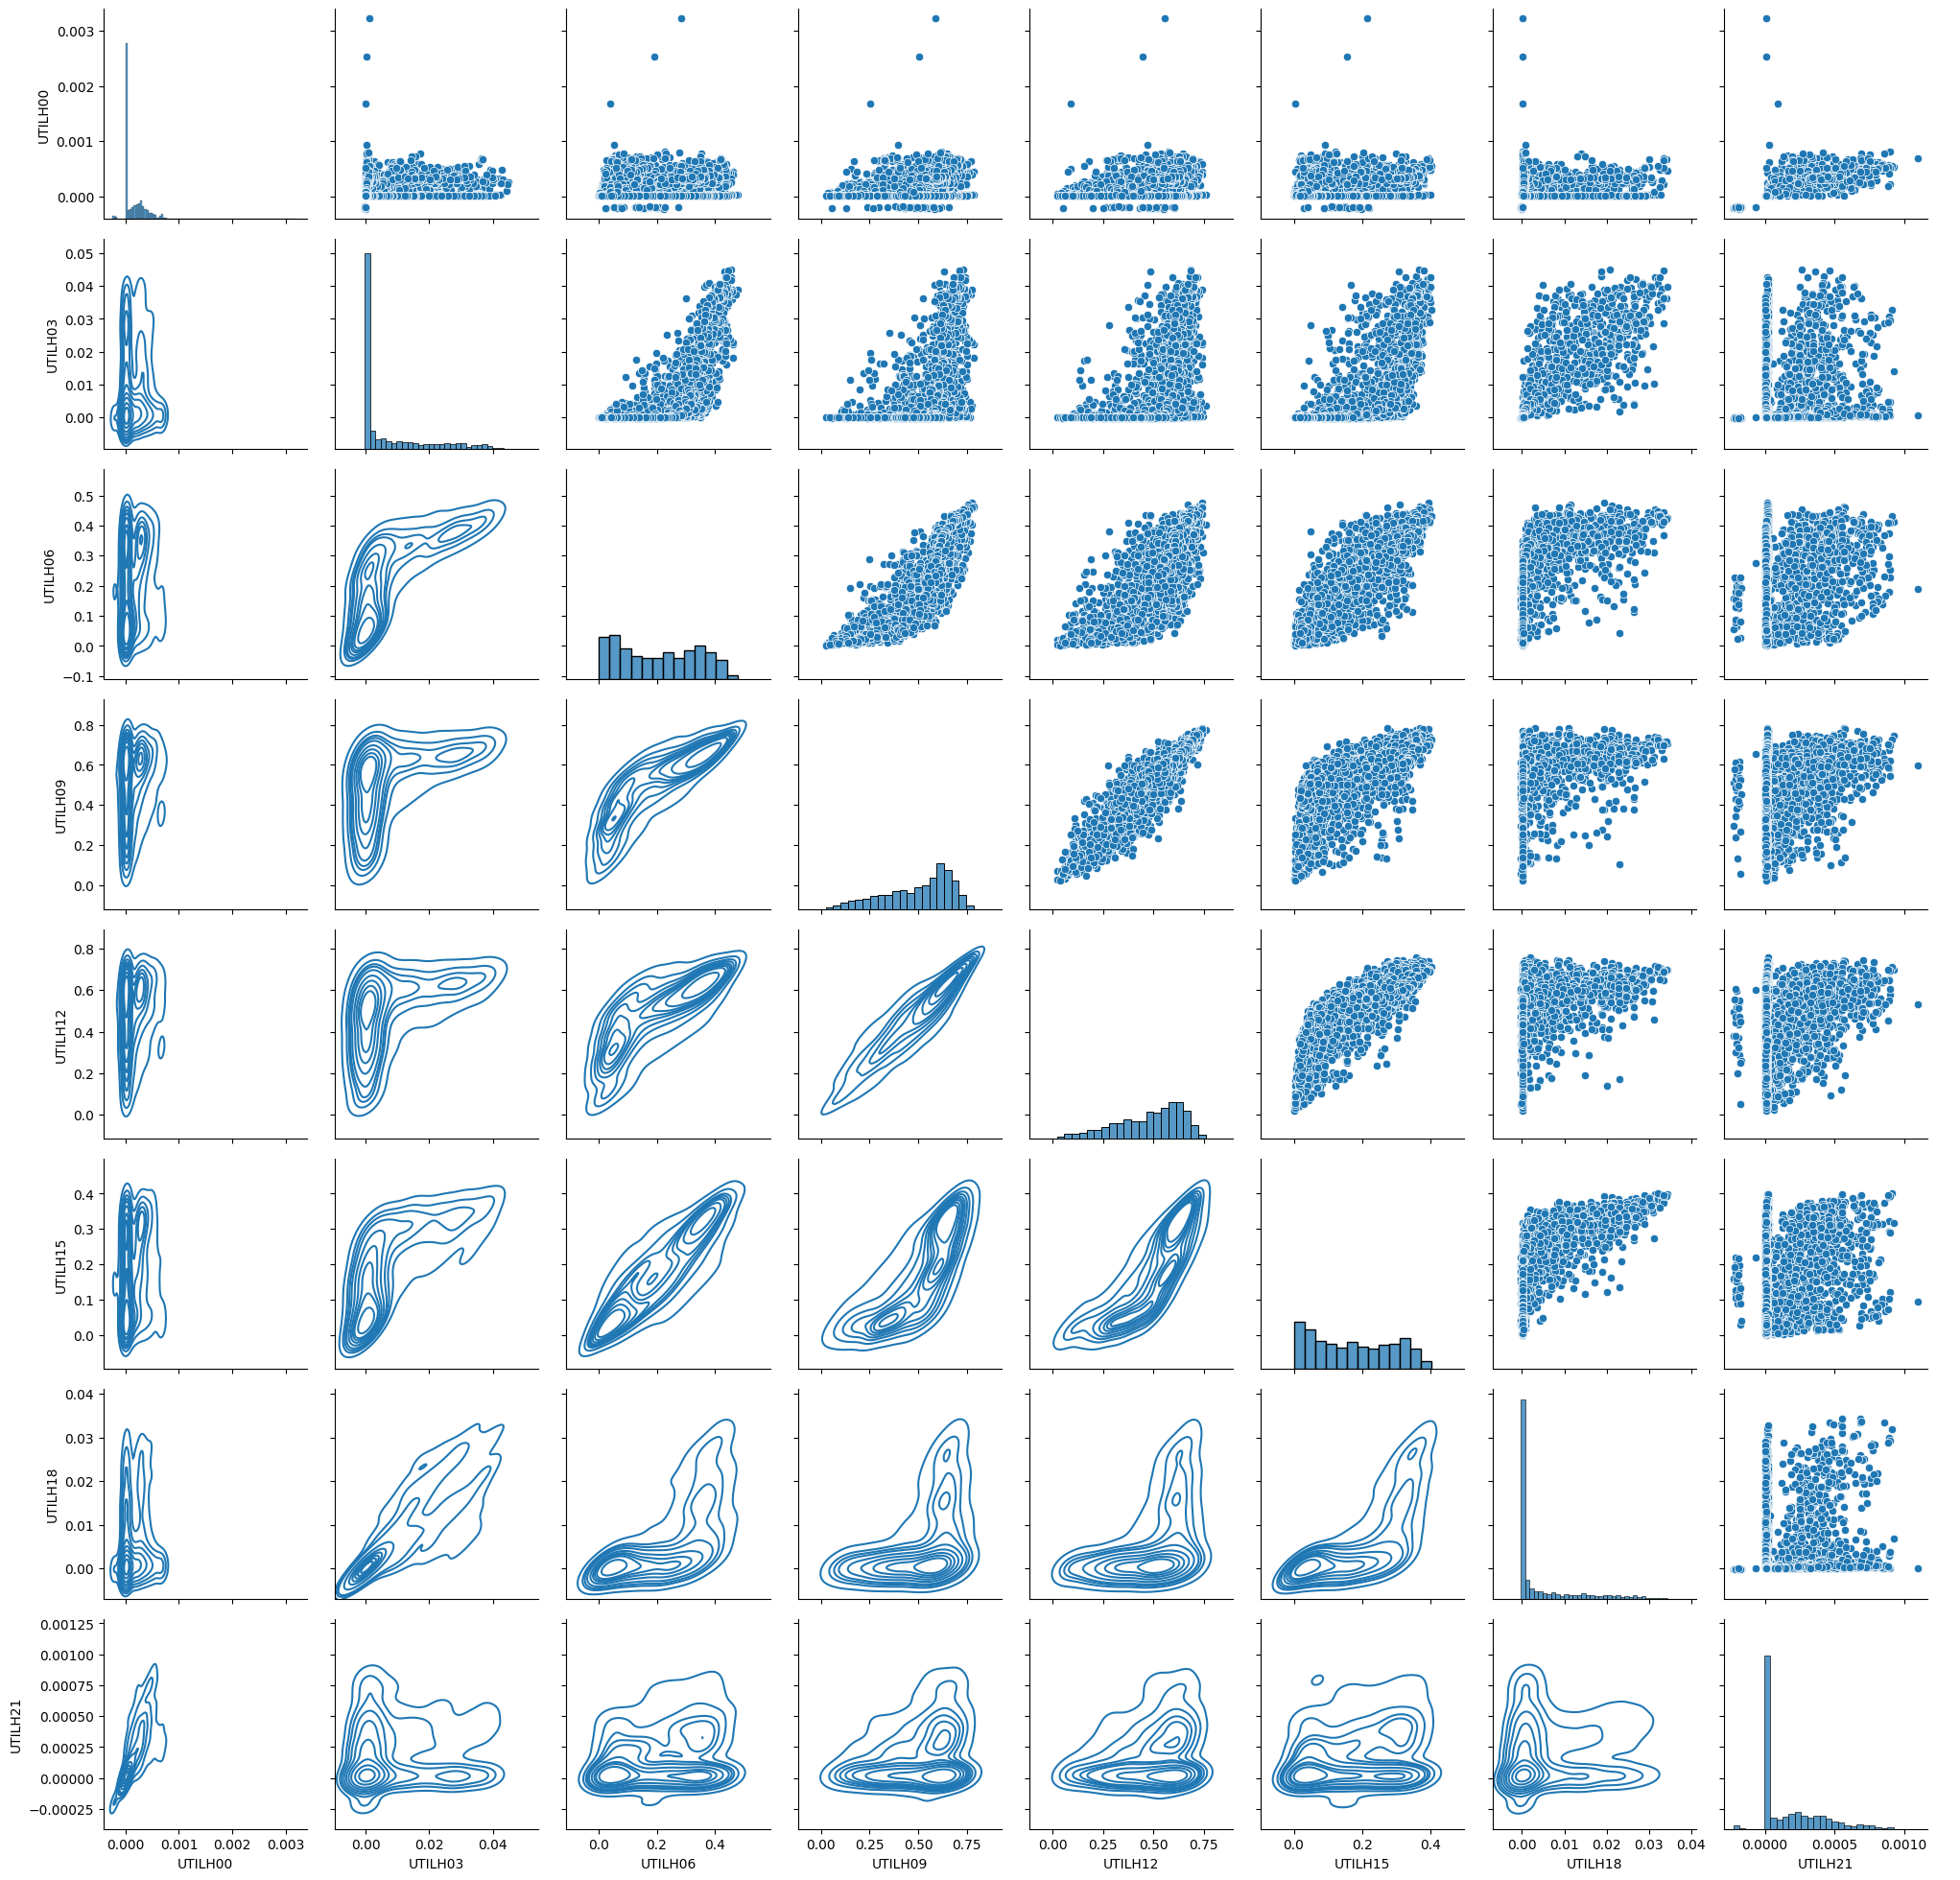

In [46]:
# Filtrar solo columnas numéricas y las que no son año, mes, dia y diasem
g = sns.PairGrid(df_orig_Util[['UTILH00','UTILH03','UTILH06','UTILH09','UTILH12','UTILH15','UTILH18','UTILH21']])
g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()

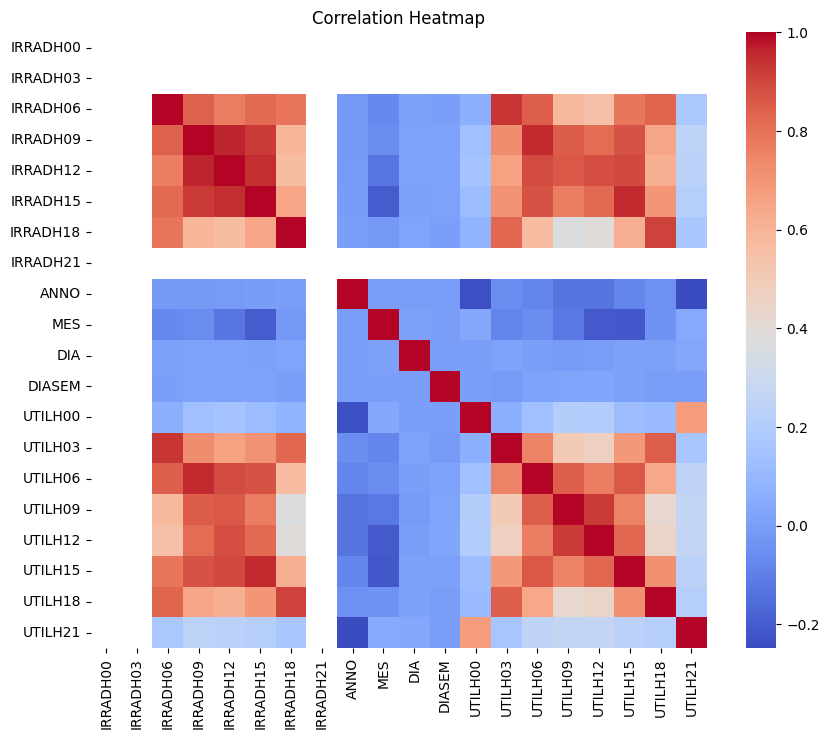

In [15]:
# Assuming df is your DataFrame
correlation_matrix = df_unido.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

+ Correlación importante de las variables de Irradiación y de Utilización
+ No hay correlación de los outputs con variables de día y dia de la semana. Las podemos quitar.
+ Con año y mes hay algo de correlación (negativa), aunque no es demasiado grande